In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
full_data = pd.read_csv('Melbourne_housing_FULL.csv', parse_dates=['Date'])
full_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
full_data = full_data[full_data['Date'] <= '2018-04-01']

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33561 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           33561 non-null object
Address          33561 non-null object
Rooms            33561 non-null int64
Type             33561 non-null object
Price            26218 non-null float64
Method           33561 non-null object
SellerG          33561 non-null object
Date             33561 non-null datetime64[ns]
Distance         33561 non-null float64
Postcode         33561 non-null float64
Bedroom2         25752 non-null float64
Bathroom         25743 non-null float64
Car              25286 non-null float64
Landsize         22461 non-null float64
BuildingArea     13316 non-null float64
YearBuilt        15079 non-null float64
CouncilArea      33559 non-null object
Lattitude        25986 non-null float64
Longtitude       25986 non-null float64
Regionname       33559 non-null object
Propertycount    33559 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), obj

In [5]:
X_full = full_data.copy()
y_full = full_data['Price']

Save target value  **Price** without NaNs to variable $y$ for analysis:

In [6]:
y = full_data[full_data.Price.notnull()]['Price']

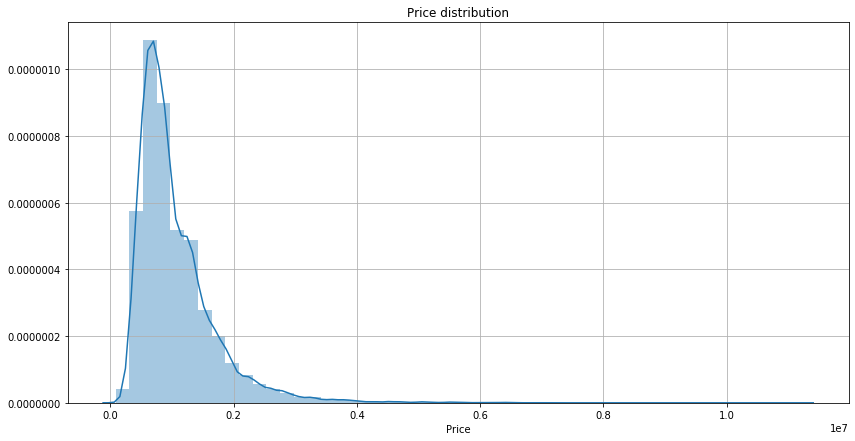

In [7]:
plt.figure(figsize=(14, 7))
sns.distplot(y)
plt.grid()
plt.title('Price distribution');

It is not a nornal distribution, so it is not a good idea to predict this value directly. So we try to take a **logarithm of target** and plot the distribution of such transformed value:

$$ \widehat{y} = ln (y + 1) $$

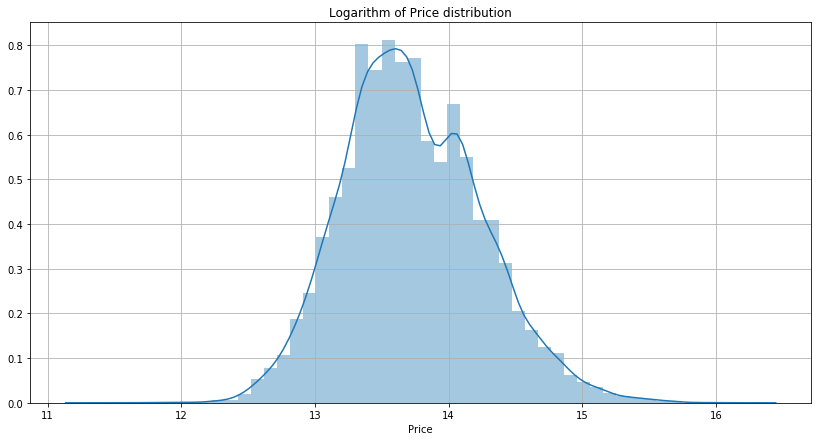

In [8]:
plt.figure(figsize=(14, 7))
sns.distplot(np.log( 1.0 + y ))
plt.grid()
plt.title('Logarithm of Price distribution');

So let's make a statistical tests for normality and skewness of distribution of $\widehat{y} $ . 

Use the **Shapiro-Wilk and Kolmogorov-Smirnov normality tests**:

In [9]:
from scipy.stats import shapiro, kstest, probplot, skew
test_stat, p_value = shapiro(np.log(y))
test_stat, p_value

C:\Users\mahsan\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.993354856967926, 2.062829485851938e-32)

In [10]:
test_stat, p_value = kstest(np.log(y), cdf='norm')
test_stat, p_value

(1.0, 0.0)

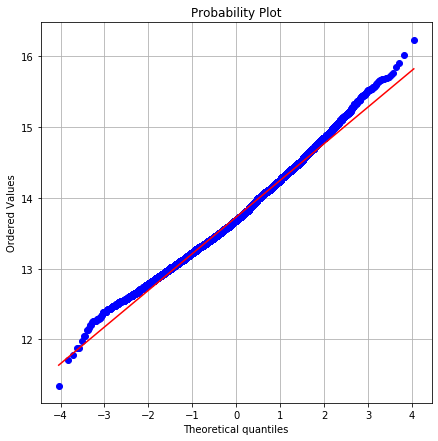

In [11]:
plt.figure(figsize=(7,7))
probplot(np.log(y), dist='norm', plot=plt);
plt.grid()

**Skewness** test. For symmetrical distribution result of skewness test is equal to zero.

In [12]:
skew(np.log(y))

0.32664952595735286

### Missing values processing

In [13]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33561 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           33561 non-null object
Address          33561 non-null object
Rooms            33561 non-null int64
Type             33561 non-null object
Price            26218 non-null float64
Method           33561 non-null object
SellerG          33561 non-null object
Date             33561 non-null datetime64[ns]
Distance         33561 non-null float64
Postcode         33561 non-null float64
Bedroom2         25752 non-null float64
Bathroom         25743 non-null float64
Car              25286 non-null float64
Landsize         22461 non-null float64
BuildingArea     13316 non-null float64
YearBuilt        15079 non-null float64
CouncilArea      33559 non-null object
Lattitude        25986 non-null float64
Longtitude       25986 non-null float64
Regionname       33559 non-null object
Propertycount    33559 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), obj

In [14]:
X_full[X_full.Postcode.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [15]:
X_full = X_full[~X_full.Postcode.isnull()]

In [16]:
X_full.Postcode = X_full.Postcode.astype(int)

In [17]:
X_full[X_full.Regionname.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,2017-07-15,5.1,3011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,2017-11-11,7.7,3124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
X_full = X_full[~X_full.Regionname.isnull()]

In [19]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33559 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           33559 non-null object
Address          33559 non-null object
Rooms            33559 non-null int64
Type             33559 non-null object
Price            26216 non-null float64
Method           33559 non-null object
SellerG          33559 non-null object
Date             33559 non-null datetime64[ns]
Distance         33559 non-null float64
Postcode         33559 non-null int32
Bedroom2         25752 non-null float64
Bathroom         25743 non-null float64
Car              25286 non-null float64
Landsize         22461 non-null float64
BuildingArea     13316 non-null float64
YearBuilt        15079 non-null float64
CouncilArea      33559 non-null object
Lattitude        25986 non-null float64
Longtitude       25986 non-null float64
Regionname       33559 non-null object
Propertycount    33559 non-null float64
dtypes: datetime64[ns](1), float64(11), int32(1), int64

Check YearBuilt values. Plot histogram:

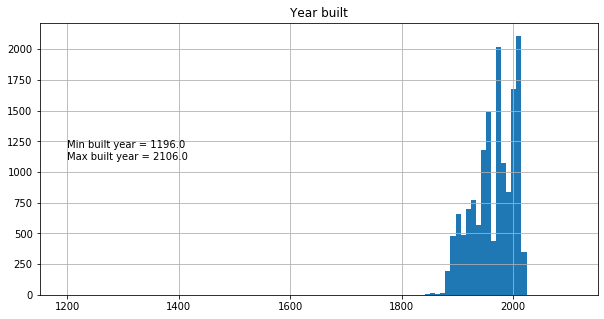

In [20]:
plt.figure(figsize=(10,5))
X_full.YearBuilt.hist(bins=100)

plt.text(x=1200, y = 1200, s='Min built year = {}'.format(X_full.YearBuilt.min()))
plt.text(x=1200, y = 1100, s='Max built year = {}'.format(X_full.YearBuilt.max()))
plt.title('Year built');

There are wrong values, including values from future and away back :)

Set them to NaN, and then fill together with other missings.

In [21]:
X_full[(X_full.YearBuilt < 1700) | (X_full.YearBuilt > 2018)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,2016-07-11,11.8,3105,...,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480.0
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149,...,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0
33033,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,2018-03-17,11.4,3204,...,1.0,4.0,635.0,242.0,2019.0,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795.0


In [22]:
X_full.loc[(X_full.YearBuilt < 1700) | (X_full.YearBuilt > 2018), 'YearBuilt'] = np.nan

Note, that there are a lot of Lattitude and Longtitude missing values. But we can restore them by Adress (using street), PostCode, RegionName, Suburb and CouncilArea values. 

Select objects with filled Lattitude and Longtitude, and find mean values for them by grouping by theese values:

In [23]:
coords_features = ['Address', 'Postcode', 'Regionname', 'Suburb', 'CouncilArea', 'Lattitude', 'Longtitude']

In [24]:
coords_data = X_full[~((X_full.Lattitude.isnull()) & (X_full.Longtitude.isnull()))][coords_features]

In [25]:
coords_data.head()

,Address,Postcode,Regionname,Suburb,CouncilArea,Lattitude,Longtitude
0,68 Studley St,3067,Northern Metropolitan,Abbotsford,Yarra City Council,-37.8014,144.9958
1,85 Turner St,3067,Northern Metropolitan,Abbotsford,Yarra City Council,-37.7996,144.9984
2,25 Bloomburg St,3067,Northern Metropolitan,Abbotsford,Yarra City Council,-37.8079,144.9934
3,18/659 Victoria St,3067,Northern Metropolitan,Abbotsford,Yarra City Council,-37.8114,145.0116
4,5 Charles St,3067,Northern Metropolitan,Abbotsford,Yarra City Council,-37.8093,144.9944


In [26]:
coords_data['Address_splitted'] = coords_data.Address.str.split(' ')
coords_data['Street'] = coords_data.Address_splitted.apply(lambda s: s[1])

In [27]:
group_features = ['Regionname','Suburb','CouncilArea']

In [28]:
coords_data_mean = coords_data.groupby(group_features)['Lattitude','Longtitude'].mean().reset_index()\
                    .rename(columns={'Lattitude': 'Lat_new', 'Longtitude': 'Lon_new'})

In [29]:
coords_data_mean.head()

,Regionname,Suburb,CouncilArea,Lat_new,Lon_new
0,Eastern Metropolitan,Bayswater,Knox City Council,-37.848626,145.260982
1,Eastern Metropolitan,Bayswater North,Maroondah City Council,-37.825929,145.284352
2,Eastern Metropolitan,Bellfield,Banyule City Council,-37.752281,145.039601
3,Eastern Metropolitan,Blackburn,Whitehorse City Council,-37.821410,145.150006
4,Eastern Metropolitan,Blackburn North,Whitehorse City Council,-37.805467,145.153947


Now add Street name to our dataset and merge it with **coords_data_mean** :

In [30]:
X_full['Address_splitted'] = X_full.Address.str.split(' ')
X_full['Street'] = X_full.Address_splitted.apply(lambda s: s[1])
X_full['HouseNumber'] = X_full.Address_splitted.apply(lambda s: s[0])
X_full.drop('Address_splitted', axis=1, inplace=True)

In [31]:
X_full_2 = pd.merge(X_full, coords_data_mean, on=group_features, how='left')

In [32]:
X_full_2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Street,HouseNumber,Lat_new,Lon_new
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067,...,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Studley,68,-37.804113,144.997427
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067,...,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Turner,85,-37.804113,144.997427
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,...,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Bloomburg,25,-37.804113,144.997427
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067,...,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,Victoria,18/659,-37.804113,144.997427
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,...,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Charles,5,-37.804113,144.997427


Now replace Nans in **Lattitude** and **Longtitude** by new values **Lat_new** and	**Lon_new**:

In [33]:
X_full_2.loc[X_full_2.Lattitude.isnull(), 'Lattitude'] = X_full_2['Lat_new']
X_full_2.loc[X_full_2.Longtitude.isnull(), 'Longtitude'] = X_full_2['Lon_new']

In [34]:
X_full_2[X_full_2.Lattitude.isnull()].shape[0]

89

No, there are 87 values unfilled, because there are some Regionname, Suburb and CouncilArea, when Lattitude and Longtitude values was missing totally. So, because count of such objects is very small compared to dataset size, we can just fill them by mean:

In [35]:
X_full_2.Lattitude = X_full_2.Lattitude.fillna(X_full_2.Lattitude.mean())
X_full_2.Longtitude = X_full_2.Longtitude.fillna(X_full_2.Longtitude.mean())

X_full_2.drop(['Lat_new','Lon_new'], axis=1, inplace=True)

Check missing values counts:

In [36]:
X_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33559 entries, 0 to 33558
Data columns (total 23 columns):
Suburb           33559 non-null object
Address          33559 non-null object
Rooms            33559 non-null int64
Type             33559 non-null object
Price            26216 non-null float64
Method           33559 non-null object
SellerG          33559 non-null object
Date             33559 non-null datetime64[ns]
Distance         33559 non-null float64
Postcode         33559 non-null int32
Bedroom2         25752 non-null float64
Bathroom         25743 non-null float64
Car              25286 non-null float64
Landsize         22461 non-null float64
BuildingArea     13316 non-null float64
YearBuilt        15076 non-null float64
CouncilArea      33559 non-null object
Lattitude        33559 non-null float64
Longtitude       33559 non-null float64
Regionname       33559 non-null object
Propertycount    33559 non-null float64
Street           33559 non-null object
HouseNumber     

So, we have missings in features: **Bedroom2, Bathroom, Car, Landsize, BuildingArea**
Before fill missing in them, let's check their distributions. They may have ouliers, that can have bad influence on filling quality and on model quality in futher.

Let's plot distributions of theese features:   

1.0     12626
2.0     10611
3.0      2105
4.0       259
5.0        73
0.0        46
6.0        14
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

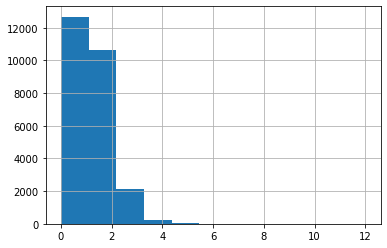

In [37]:
# Bathroom
X_full_2[~X_full_2.Bathroom.isnull()].Bathroom.hist(bins=11)
X_full_2[~X_full_2.Bathroom.isnull()].Bathroom.value_counts()

There are objects with 7 and more bathrooms! Let's look at them:

In [38]:
X_full[X_full.Bathroom >= 8][['Suburb', 'Address', 'Rooms', 'Type', 'Method',  'Date',
       'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']]

,Suburb,Address,Rooms,Type,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
2536,Burwood,36 Cumming St,3,h,PI,2016-08-10,11.7,30.0,12.0,0.0,946.0,NaN,1950.0,NaN
8251,Preston,421 Murray Rd,4,h,PI,2016-05-22,8.8,9.0,8.0,7.0,1254.0,280.0,1928.0,760000.0
17472,Camberwell,1088 Toorak Rd,8,h,PI,2017-08-07,7.7,8.0,8.0,4.0,650.0,NaN,NaN,2200000.0
25717,Burwood,79 Elgar Rd,10,h,SP,2017-10-28,10.4,10.0,9.0,2.0,612.0,466.0,2015.0,2315000.0
26210,Mitcham,20 Harrison St,16,h,S,2017-10-28,17.2,16.0,8.0,8.0,NaN,NaN,NaN,5000000.0


3.0     11448
4.0      6063
2.0      5685
5.0      1364
1.0       964
6.0       156
7.0        29
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
20.0        1
12.0        1
16.0        1
Name: Bedroom2, dtype: int64

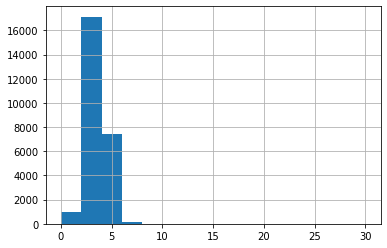

In [39]:
# Bedroom
X_full_2[~X_full_2.Bedroom2.isnull()].Bedroom2.hist(bins=15)
X_full_2[~X_full_2.Bedroom2.isnull()].Bedroom2.value_counts()

Is seems very suspicious, especially objects, when **bedrooms quantity is equals to bathrooms quantity :)**
The same for zero count of bedrooms.

So, it's better solution **to drop objects with bathrooms quantity more than 6 and with bedrooms quantity more than 8 (or equal to zero):**

In [40]:
X_full_3 = X_full_2[(X_full_2.Bathroom.isnull()) | (X_full_2.Bathroom <= 6)]
X_full_3 = X_full_3[(X_full_3.Bedroom2.isnull()) | ((X_full_3.Bedroom2 <= 8) & (X_full_3.Bedroom2 > 0))]

Check **Car** feature:

2.0     11715
1.0      8960
0.0      1598
3.0      1543
4.0      1104
5.0       143
6.0       133
7.0        22
8.0        21
10.0        5
9.0         3
11.0        2
18.0        1
26.0        1
12.0        1
Name: Car, dtype: int64

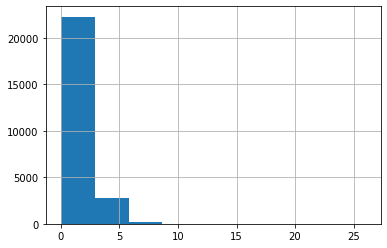

In [41]:
# Car
X_full_3[~X_full_3.Car.isnull()].Car.hist(bins=9)
X_full_3[~X_full_3.Car.isnull()].Car.value_counts()

In [42]:
X_full[X_full.Car > 9 ][['Suburb', 'Address', 'Rooms', 'Type', 'Method',  'Date',
       'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']].head()

,Suburb,Address,Rooms,Type,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
4324,Fitzroy North,416 Queens Pde,5,h,S,2016-08-28,3.5,4.0,2.0,11.0,1010.0,440.0,NaN,NaN
6017,Kew,25 Duke St,2,h,S,2016-09-24,5.6,2.0,2.0,26.0,267.0,500.0,2011.0,NaN
15449,Bayswater,95 Orange Gr,4,h,SP,2017-06-17,23.2,4.0,1.0,10.0,993.0,128.0,1966.0,925000.0
18923,Dandenong,1462 Heatherton Rd,3,h,S,2017-07-22,24.7,3.0,2.0,10.0,734.0,NaN,NaN,880000.0
23395,Reservoir,1 Don St,4,h,S,2017-08-26,12.0,4.0,2.0,10.0,1002.0,170.0,1985.0,1112000.0


So, we see, that objects with carspots quantity more than 9 have very big Landsize values and suspiciously low prices. So, theese **objects aren't look like most others**, and we will drop them too:

In [43]:
X_full_3 = X_full_3[(X_full_3.Car.isnull()) | (X_full_3.Car < 9)]

Check **Landsize** feature:

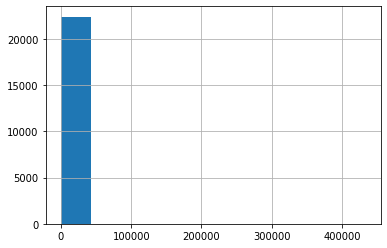

In [44]:
# Landsize
X_full_3[~X_full_3.Landsize.isnull()].Landsize.hist();

So, distribution is very skewed, because of outliers with very huge values. Let's find **mean value** and calculate **99.9% quantile for Landsize** feature. Also, find objects with top-10 Landsizes in our dataset:

In [45]:
# Find mean value of Landsize:
X_full_3.Landsize.mean()

589.8170666428763

In [46]:
# Find 99.9 % quantile of Landsize:
q_99 = X_full_3[~X_full_3.Landsize.isnull()].Landsize.quantile(0.999)
q_99

17200.0

In [47]:
# Find top-10 objects with biggest Landsize:
top_10_landsizes = sorted(X_full_3[~X_full_3.Landsize.isnull()].Landsize, reverse=True)[:10]

In [48]:
top_10_landsizes

[433014.0,
 146699.0,
 89030.0,
 80000.0,
 76000.0,
 75100.0,
 44500.0,
 42800.0,
 41400.0,
 40500.0]

In [49]:
X_full_3[X_full_3.Landsize.isin(top_10_landsizes)][['Suburb', 'Address', 'Rooms', 'Type', 'Method',  'Date',
       'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']]

,Suburb,Address,Rooms,Type,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
1198,Balwyn North,9 Gildan St,3,h,VB,2016-08-28,9.2,3.0,1.0,2.0,75100.0,NaN,NaN,2000000.0
8599,Reservoir,14 Beenak St,3,h,S,2016-04-23,11.2,3.0,1.0,2.0,41400.0,NaN,NaN,572000.0
17293,Silvan,16 Eleanor Dr,3,h,S,2017-05-27,34.6,3.0,2.0,2.0,76000.0,NaN,NaN,1085000.0
18036,Fitzroy,389 Gore St,3,h,VB,2017-12-08,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,2700000.0
22631,New Gisborne,71 Hamilton Rd,5,h,S,2017-09-23,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,1355000.0
24799,Wildwood,430 Wildwood Rd,5,h,S,2017-10-14,31.7,5.0,2.0,2.0,89030.0,NaN,NaN,1030000.0
26867,Bullengarook,65 Webb Rd,4,h,PI,2017-11-11,45.9,4.0,2.0,1.0,146699.0,NaN,NaN,1050000.0
31090,Wandin North,237 Warburton Hwy,4,h,PI,2018-03-03,35.2,4.0,2.0,2.0,40500.0,NaN,NaN,1150000.0
31279,Diggers Rest,55 Morefield Ct,4,h,PI,2018-02-17,27.7,4.0,2.0,NaN,80000.0,NaN,NaN,NaN
32757,Bullengarook,11 Dohoney Rd,4,h,S,2018-02-24,45.9,4.0,2.0,0.0,42800.0,180.0,2000.0,865000.0


So, almost all of them are located far from CBD (mean distance is about 11 km). As with other outliers, we shall drop objects with Landsize more than 99.9%, because they will have bad influence on model quality:

In [50]:
X_full_3 = X_full_3[(X_full_3.Landsize.isnull()) | (X_full_3.Landsize < q_99)]

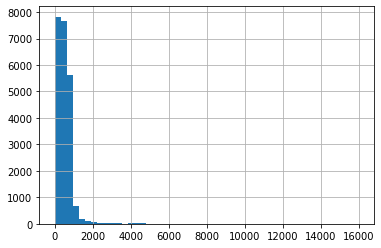

In [51]:
X_full_3[~X_full_3.Landsize.isnull()].Landsize.hist(bins=50);

Check **BuildingArea** feature:

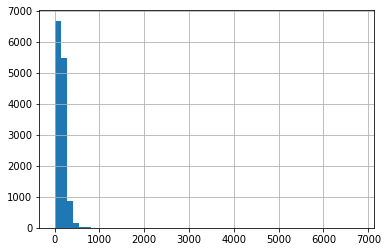

In [52]:
# Landsize
X_full_3[~X_full_3.BuildingArea.isnull()].BuildingArea.hist(bins=50);

We have the same situation  as with **Landsize**, so let's repeat the procedure for outliers dropping with **BuildingArea** feature:

In [53]:
# Find 99 % quantile of Landsize:
q_99 = X_full_3[~X_full_3.BuildingArea.isnull()].BuildingArea.quantile(0.99)
q_99

467.41999999999825

In [54]:
X_full_3 = X_full_3[(X_full_3.BuildingArea.isnull()) | (X_full_3.BuildingArea < q_99)]

Plot the distribution after outliers removing:

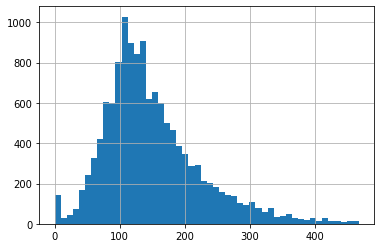

In [55]:
X_full_3[~X_full_3.BuildingArea.isnull()].BuildingArea.hist(bins=50);

Note, that BuildingArea can't be equal to zero! (unlike Landsize). But we have several zero values in BuildingArea feature. It seems to be mistake, so let's change theese zero values to NaNs:

In [56]:
X_full_3.loc[X_full_3.BuildingArea == 0, 'BuildingArea'] = np.nan

So, we dropped objects with abnormal values of several features. 

**I think, in real business task we just have to build others, separates models for every group of such objects. But in this task our goal is to build one model for most of objects in our dataset.**

In [57]:
X_full_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33352 entries, 0 to 33558
Data columns (total 23 columns):
Suburb           33352 non-null object
Address          33352 non-null object
Rooms            33352 non-null int64
Type             33352 non-null object
Price            26055 non-null float64
Method           33352 non-null object
SellerG          33352 non-null object
Date             33352 non-null datetime64[ns]
Distance         33352 non-null float64
Postcode         33352 non-null int32
Bedroom2         25545 non-null float64
Bathroom         25536 non-null float64
Car              25081 non-null float64
Landsize         22275 non-null float64
BuildingArea     13080 non-null float64
YearBuilt        14951 non-null float64
CouncilArea      33352 non-null object
Lattitude        33352 non-null float64
Longtitude       33352 non-null float64
Regionname       33352 non-null object
Propertycount    33352 non-null float64
Street           33352 non-null object
HouseNumber     

**It would be more correct to process NaNs in features like we did it with Lattitude and Longtitude by calculating mean values in groups with similar objects without NaNs and use those values to fill NaNs. **

But let't use **SimpleImputor** from Sklearn for saving time and variety :)

In [58]:
import sklearn
from sklearn.impute import SimpleImputer

In [59]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='median')

Select features for imputing:

In [60]:
features_with_nans = X_full_3.columns[X_full_3.isnull().any()].tolist()
features_with_nans.remove('Price')

In [61]:
X_full_3.reset_index(drop=True, inplace=True)
X_to_impute = X_full_3[features_with_nans].copy()

In [63]:
X_imputed_array = imputer_mean.fit_transform(X_to_impute)
X_imputed = pd.DataFrame(data=X_imputed_array, columns=features_with_nans)

In [64]:
X_full_4 = pd.concat([X_full_3.drop(features_with_nans, axis=1), X_imputed], axis=1)

In [65]:
X_full_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33352 entries, 0 to 33351
Data columns (total 23 columns):
Suburb           33352 non-null object
Address          33352 non-null object
Rooms            33352 non-null int64
Type             33352 non-null object
Price            26055 non-null float64
Method           33352 non-null object
SellerG          33352 non-null object
Date             33352 non-null datetime64[ns]
Distance         33352 non-null float64
Postcode         33352 non-null int32
CouncilArea      33352 non-null object
Lattitude        33352 non-null float64
Longtitude       33352 non-null float64
Regionname       33352 non-null object
Propertycount    33352 non-null float64
Street           33352 non-null object
HouseNumber      33352 non-null object
Bedroom2         33352 non-null float64
Bathroom         33352 non-null float64
Car              33352 non-null float64
Landsize         33352 non-null float64
BuildingArea     33352 non-null float64
YearBuilt        

So, now there is no NaNs in our features values. 
**But there are NaNs in target value - Price**. 
Before building the model we will drop objects with missing targets.

Now let's split our data into features dataframe and target vector:

In [67]:
data_total = X_full_4.copy()

Add **Street** and **HouseNumber** again:

In [68]:
data_total['Address_splitted'] = data_total.Address.str.split(' ')
data_total['Street'] = data_total.Address_splitted.apply(lambda s: s[1])
data_total['HouseNumber'] = data_total.Address_splitted.apply(lambda s: s[0])
data_total.drop(['Address_splitted', 'Address'], axis=1, inplace=True)

In [69]:
data_total.YearBuilt = data_total.YearBuilt.astype(int)
data_total.Bedroom2 = data_total.Bedroom2.astype(int)
data_total.Bathroom = data_total.Bathroom.astype(int)
data_total.Car = data_total.Car.astype(int)

In [70]:
data = data_total[~data_total.Price.isnull()]

In [71]:
X_total = data_total.drop('Price', axis=1)

In [72]:
# Features for objects with price only
X = data_total[~data_total.Price.isnull()].drop('Price', axis=1)


In [73]:
# Target vector
y = data_total[~data_total.Price.isnull()]['Price']

Check shapes of dataframes:

In [74]:
X.shape, y.shape

((26055, 21), (26055,))

### Numerical features relashonships

In [75]:
numerical_features = ['Rooms','Distance', 'Propertycount', 
                      'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                      'BuildingArea', 'YearBuilt', 'HouseNumber']

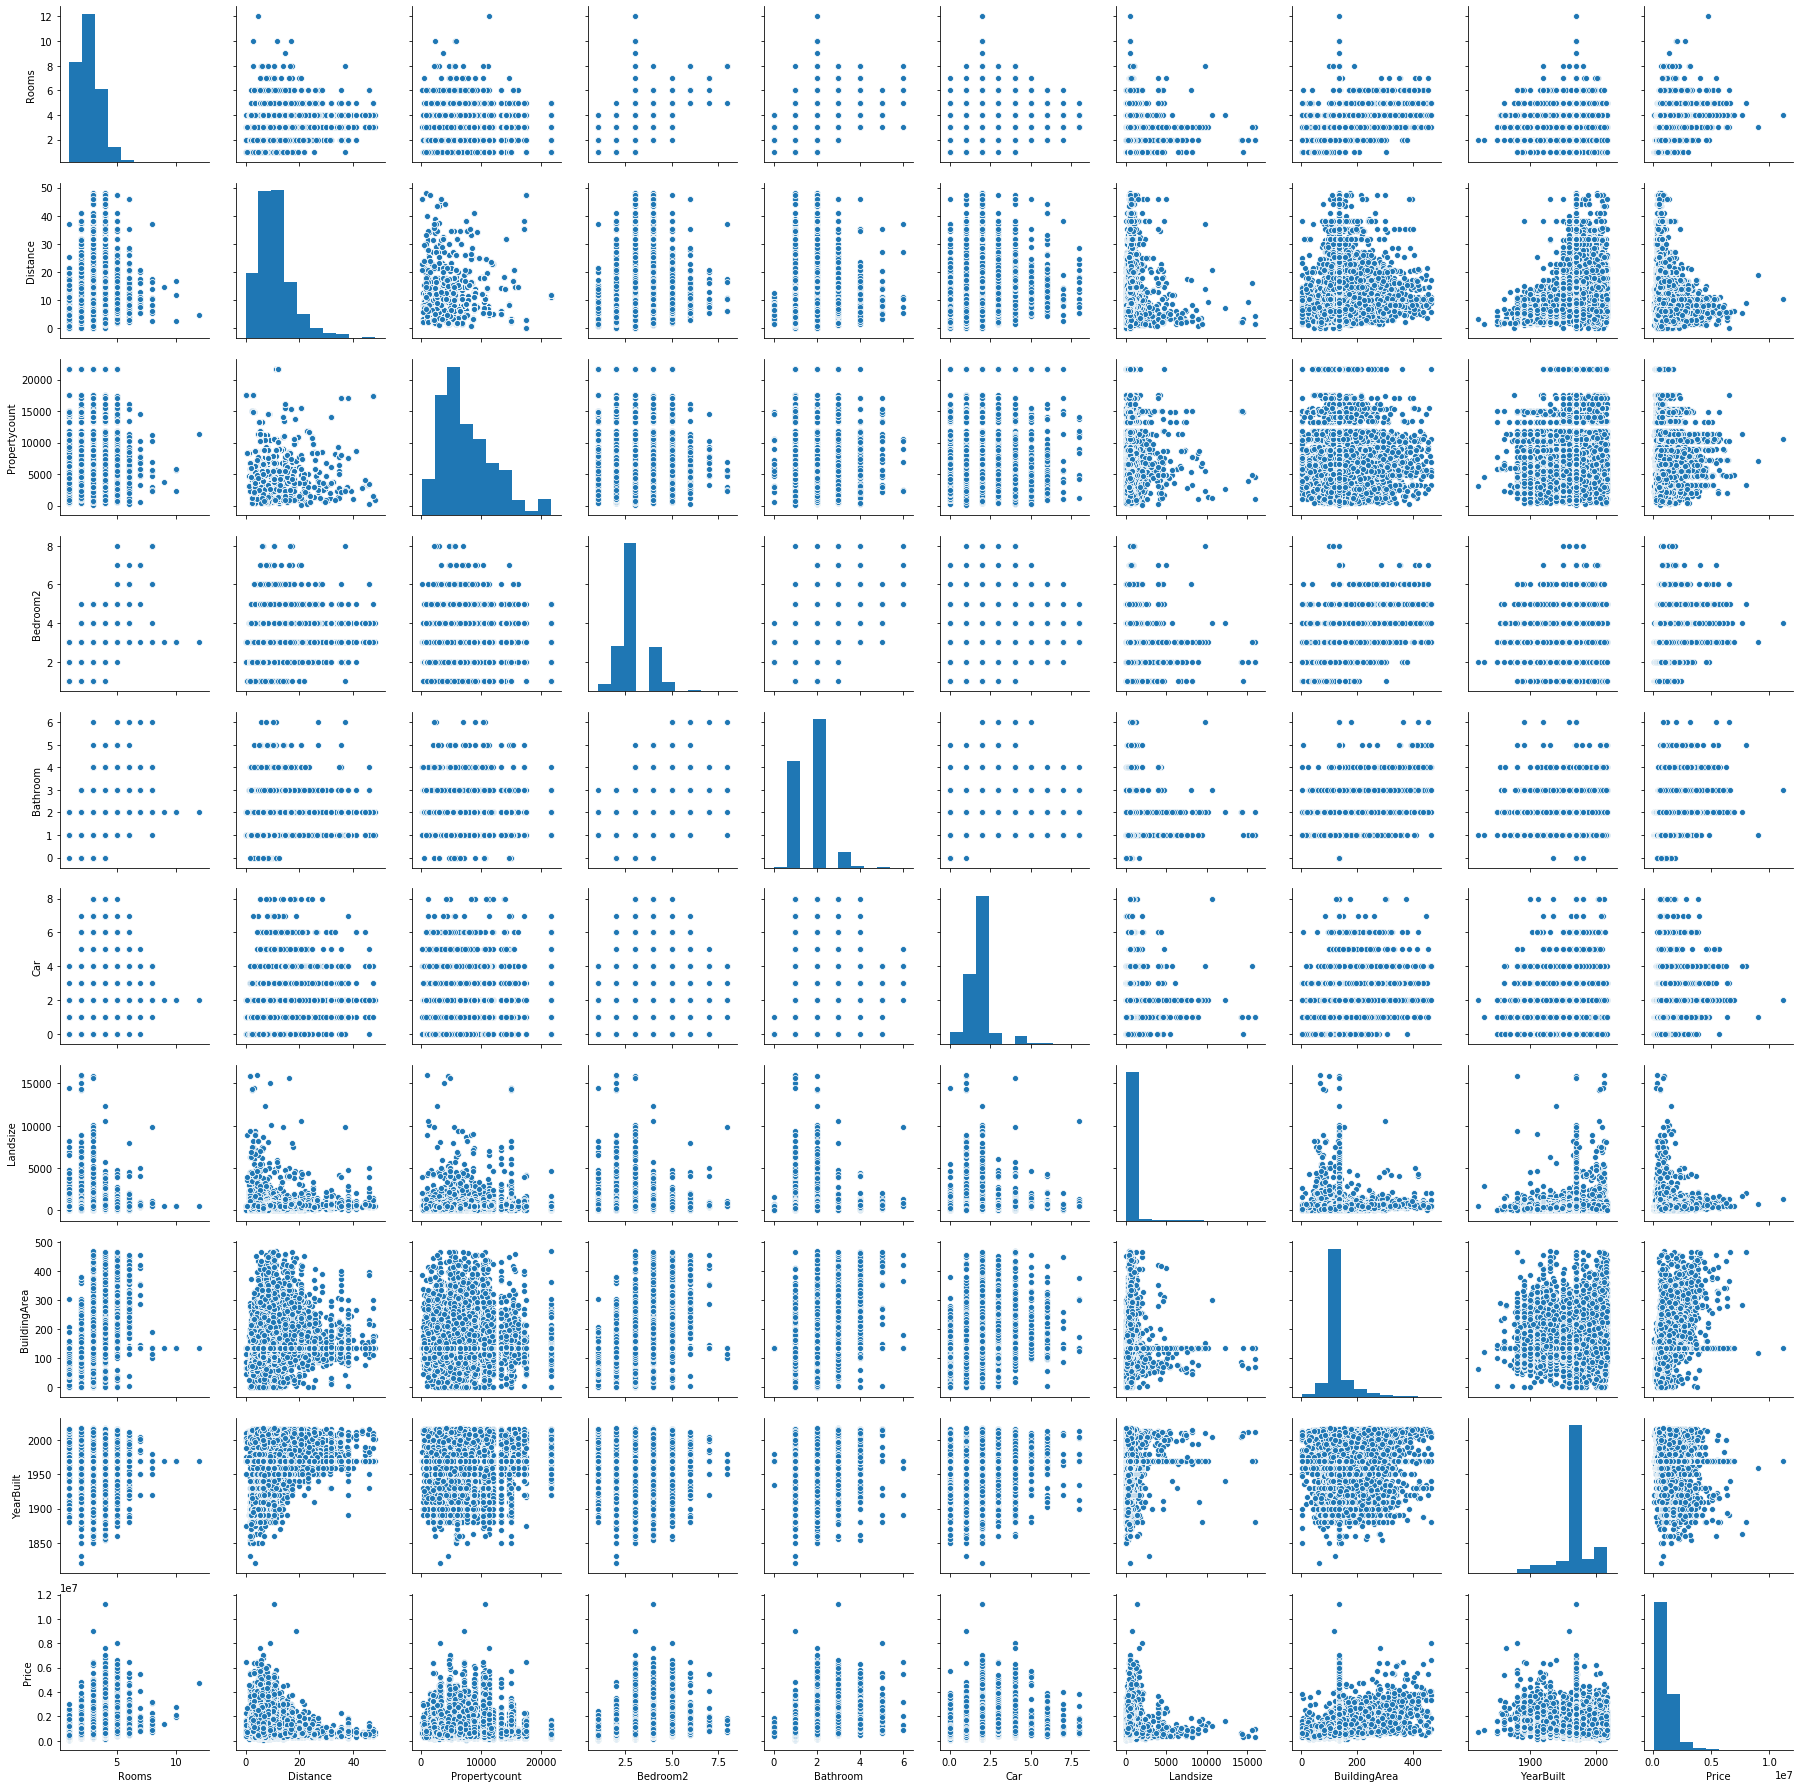

In [76]:
sns.pairplot(data=data[numerical_features + ['Price']]);

So, let's plot the most interesting of them seprately: 

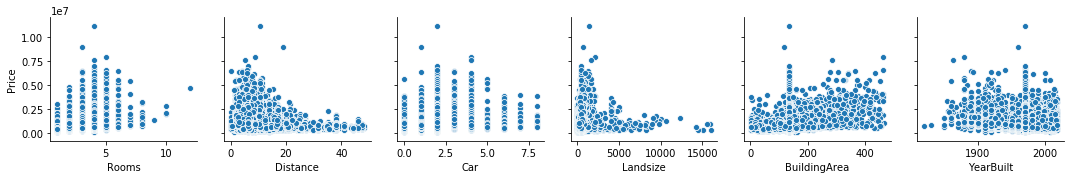

In [77]:
sns.pairplot(data=data[numerical_features + ['Price']], 
             y_vars=['Price'], 
             x_vars=['Rooms',  'Distance',
                     'Car', 'Landsize', 'BuildingArea', 'YearBuilt']);

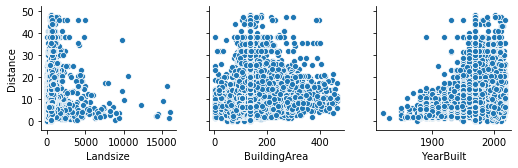

In [78]:
sns.pairplot(data=data[numerical_features + ['Price']], 
             y_vars=['Distance'], 
             x_vars=['Landsize', 'BuildingArea', 'YearBuilt']);

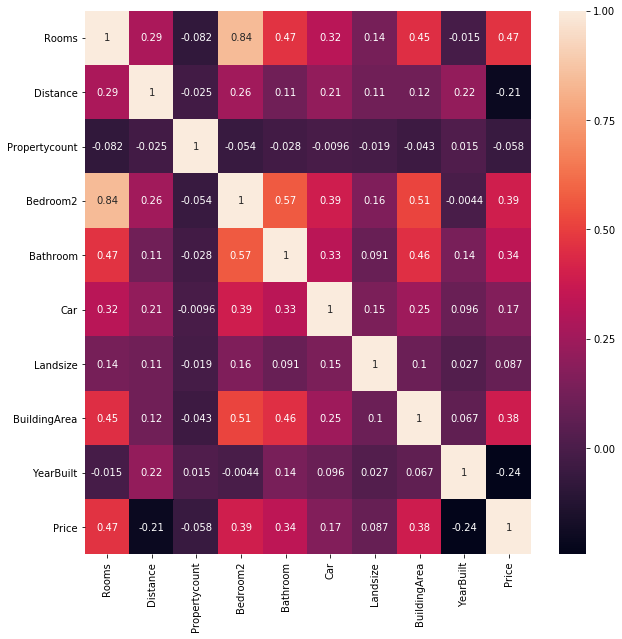

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(data[numerical_features + ['Price']].corr(), annot=True)

So, **Rooms, BuidingArea, Bedroom2, Bathroom, Car** are positive correlated with **Price** as expected.

Features like **YearBuilt** may have more complex dependencies with price, because they have different categorical features values (for exaple **Type** and **Regionname**). To check this hypothesis we have to analyze this and other muneric features in more detail. 

#### Categorical features relashonships with target

I use **seaborn boxplot** to visualize price distributions in different groups of cat.features

Let's look, how prices are distributed depending on the **Type** feature:

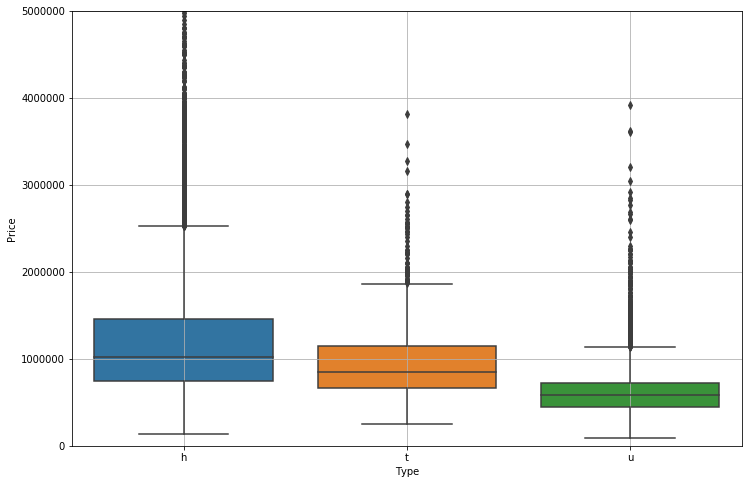

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Type', y='Price',
            data=data);
plt.ylim((0, 0.5*1e7))
plt.grid()
plt.show()

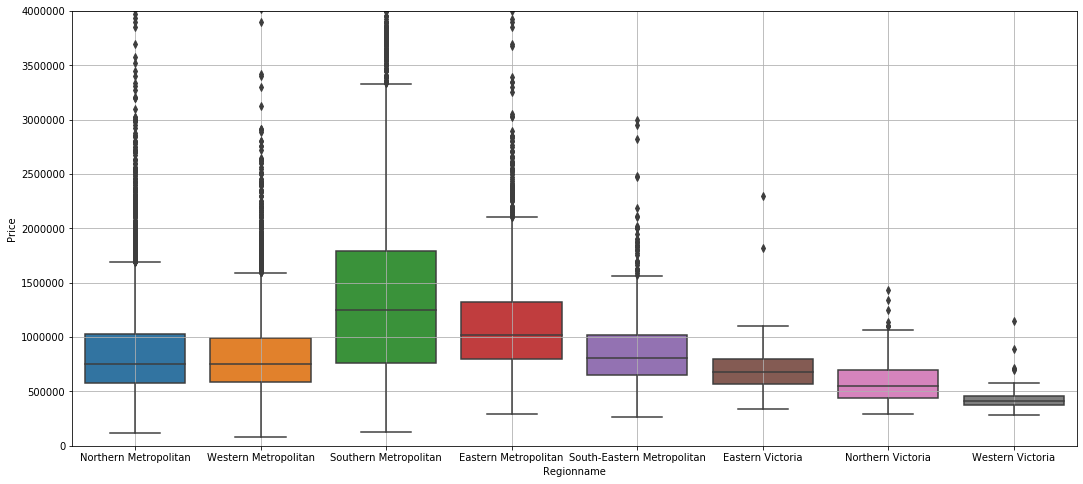

In [82]:
plt.figure(figsize=(18,8))

sns.boxplot(x='Regionname', y='Price',
            data=data);
plt.ylim((0, 0.4*1e7))
plt.grid()
plt.show()

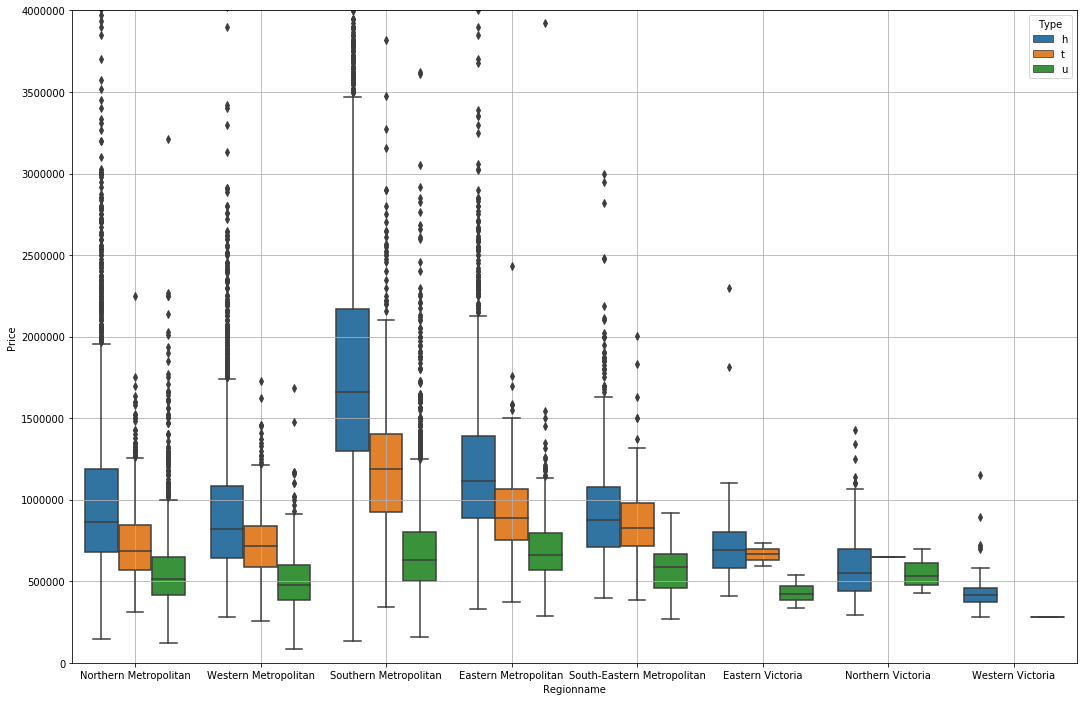

In [83]:
plt.figure(figsize=(18,12))

sns.boxplot(x='Regionname', y='Price',
            hue='Type',
            data=data);
plt.ylim((0, 0.4*1e7))
plt.grid()
plt.show()

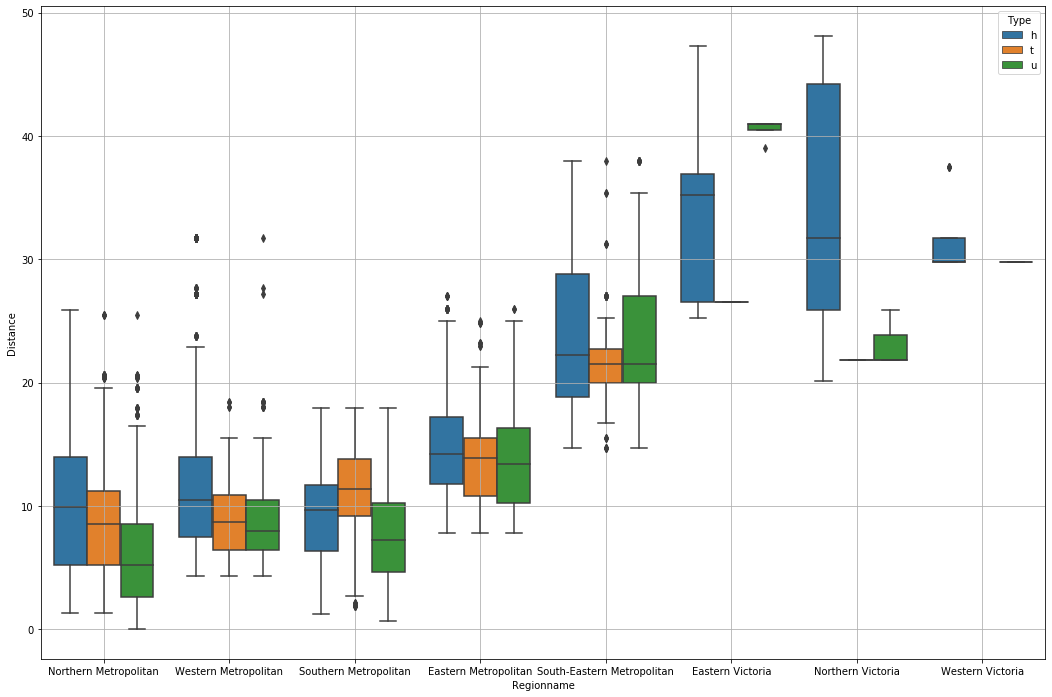

In [84]:
plt.figure(figsize=(18,12))

sns.boxplot(x='Regionname', y='Distance',
            hue='Type',
            data=data);
plt.grid()
plt.show()

To find out, how many objects contain different regions, how many objects was selled by different methods, let's drow  **countplots**:

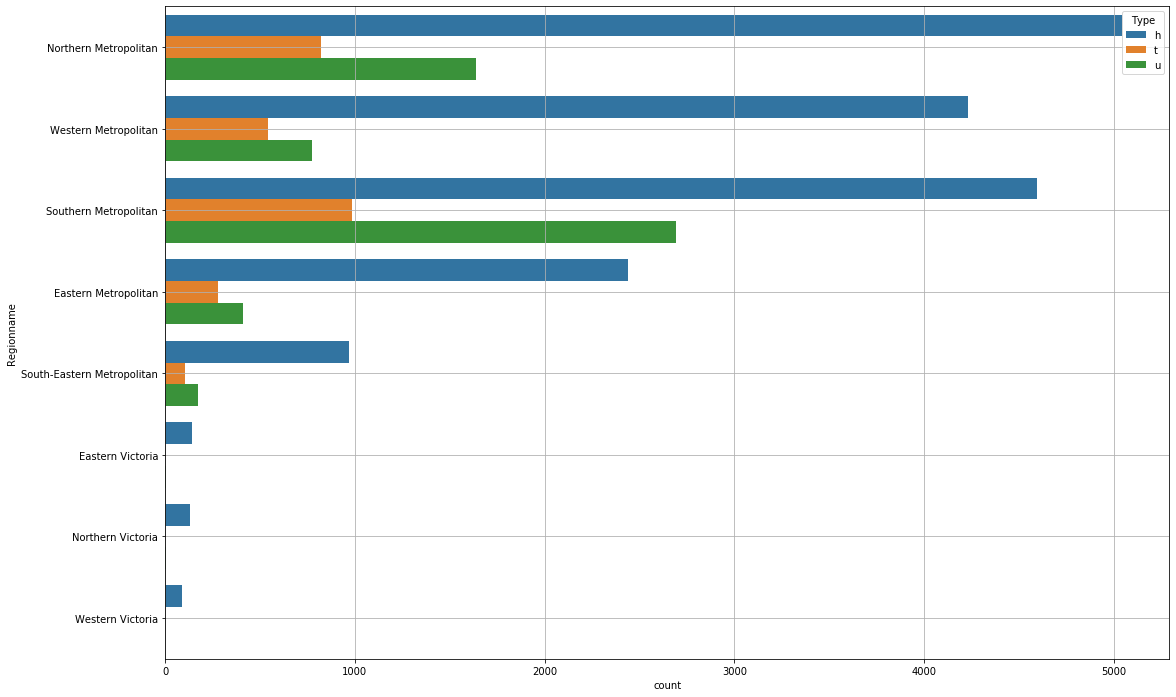

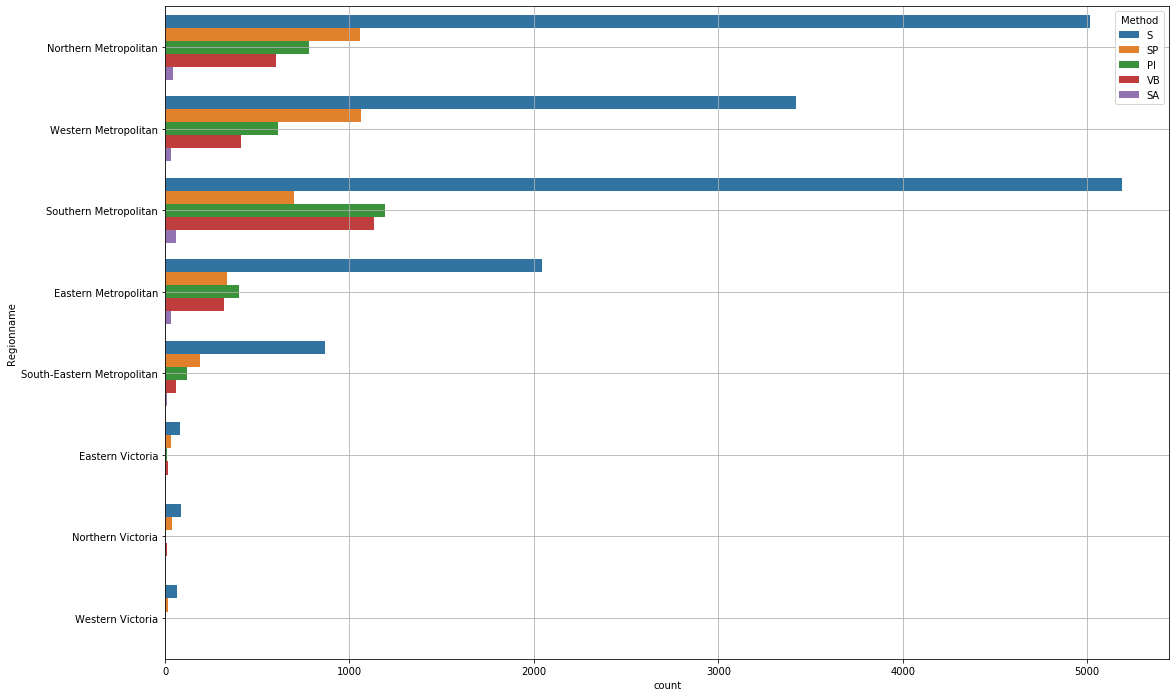

In [85]:
plt.figure(figsize=(18,12))
sns.countplot(data=data, hue='Type', y='Regionname');
plt.grid()

plt.figure(figsize=(18,12))
sns.countplot(data=data, hue='Method', y='Regionname');
plt.grid()

In [94]:
prices_by_yearbuilt = data[['YearBuilt', 'Price']]\
.groupby('YearBuilt')\
.agg(['mean'])

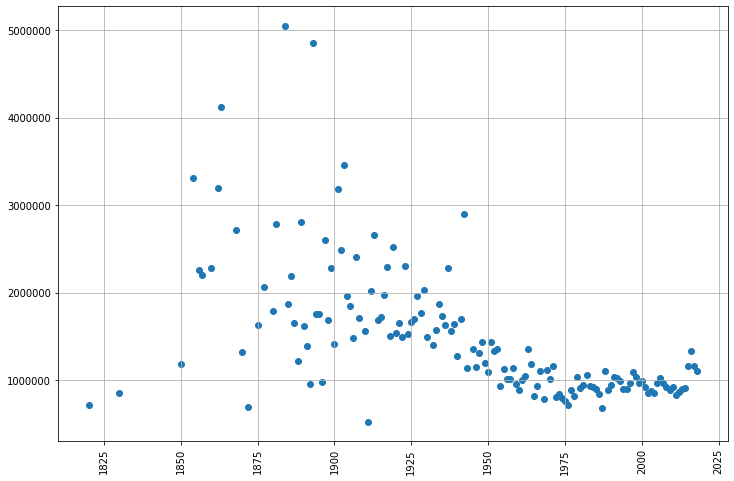

In [95]:
plt.figure(figsize=(12,8))
plt.scatter(x=prices_by_yearbuilt.index,y=prices_by_yearbuilt.values[:,0])
plt.xticks(rotation=90)

plt.grid()
plt.show()

In [97]:
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


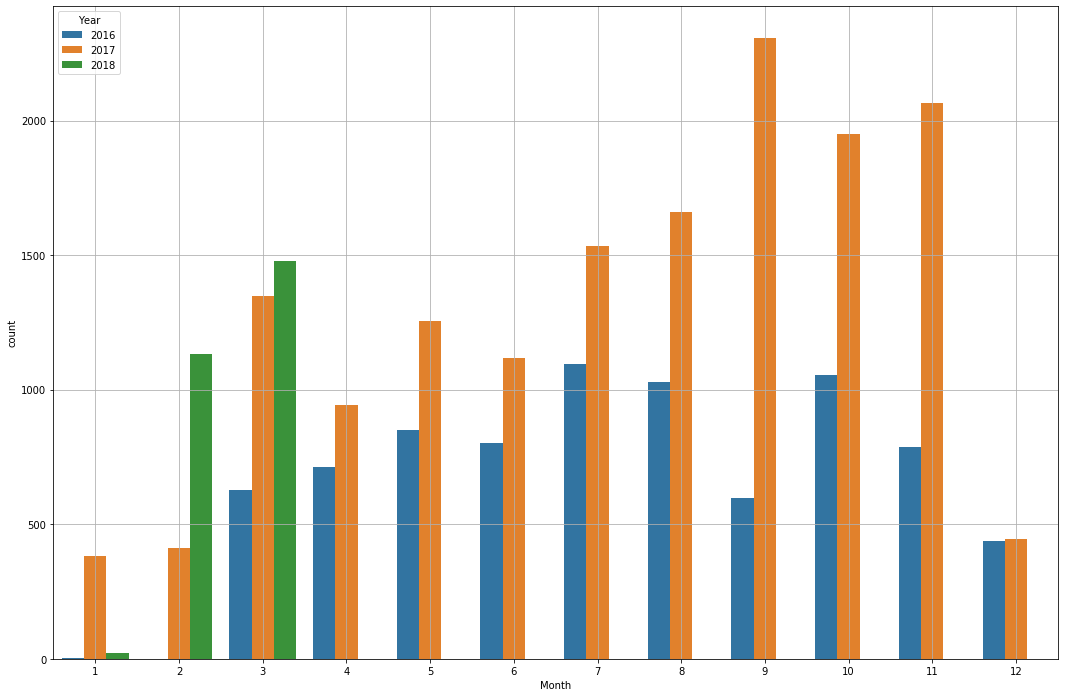

In [98]:
plt.figure(figsize=(18,12))

sns.countplot(x='Month',
              hue='Year',
              data=data);
plt.grid()
plt.show()

### Conclusions

1. It's evident, that features **Rooms,  Bedroom2, Bathroom, Car, Landsize, BuildingArea**  are directly proportional to house price. Therefore, it is expected that they should have a high correlation with target.
<font color = 'green'> Yes, in general, without grouping by cat. fatures it's true. </font>
 
2. **Date** of sold probably will have seasonal influence on price: for example, there is low season at summer and high season at winter. 
<font color = 'red'> No, there is no seasonality during the year. There is rather **uptrend** during all period in dataset. </font>
 
3. **Distance** from CBD may have complex, non-linear influence on price. On the one hand, the price should be the highest in the center and should decrease when moving to the outskirts. On the other hand, in the centre of big city there is a bad ecology and very noisy. 
<font color = 'red'> No, there is realy mostly linear dependency between **Distance** and **Price**. It's confirmed by pairplot and negative correlation coefficient </font>
  
4. Similar reasoning can be done for the **YearBuilt** of construction. On the one hand, the price should be the highest for the new buildings and houses. On the other hand, very old buildings may be architectural monuments and have historical value, so very old buildings may have very high prices.
<font color = 'green'> Yes, there is really non-linear complex dependency: we can't see linear dependency on pairplot, but there is small negative correlation coefficient in generally.   </font>
 
5. Features **Suburb, Postcode, Regionname** characterize houses locations in the city, and, as consequences, crime situation and transport accessibility. So, theese features and their different combinations should influence on the house price.
<font color = 'green'> Yes, there is really different prices in different regions. But it's rather consequence of **Distance** value. 
 </font>

6. **CouncilArea** may characterize the quality of local goverment work. The degree of well-being is depends on this work and, as consequence, depend a house prices in different areas.
<font color = 'green'> Yes, there is really different prices in different **CouncilArea**. But but just like **Suburb, Postcode, Regionname** it's rather consequence of **Distance** value. 
 </font>
7. **Type** of property certainly matters, because own cottage or villa is more expensive, than duplex with neighbors.
<font color = 'green'> Absolutely right, there is really different prices.
 </font>

### Patterns, insights, pecularities of data 

1. Houses of different types have significant price differences. So, we'll take in account **Type** feature in our predicttion model.

2. Features, that match physical parameters of houses - **'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'** - have a direct influence on price according to principle "the larger the size/count, the more expensive". So, theese features are important.

3. There is mostly linear dependency between **Distance** and **Price**. So, **Distance** is important feature.

4. Features **Suburb, Postcode, Regionname, CouncilArea** characterize houses locations. But, as it was visible on our "maps", **Suburb** and **Postcode** introduse almost the same city divisions, so we don't need both of them. Moreover, they introduse too much detalization and this information can be unuseful in our model unlike features **Regionname, CouncilArea**, so we'll first of all try  **Regionname, CouncilArea** in our model.

5. It was unexpected, but sales method - feature **Method** - really matters, at that, we can observe this influence along all types of houses. So, it will be important information in our model too.

6. Sutuation with **YearBuilt** is not easy. For houses buld before 1950 there is a huge price variance. From 1950 to 2013 average price is much more stable. But new houses, build after 2013 have higher average price. So, this feature is important, but we need to tranform it before addition to our model.

### Model selection

The most of features in our data, as shown before, have a linear dependency with **Price**. So, this is a good reason to use ***linear regression model*** in our task. Despite of its siplicity, linear models have several advantages in our task:

1. Fitting very fast 
2. Effective with a huge count of features (we have a categorical features with multiple values, so after, for example, one hot encoding, we'll get a hundreds of them)
3. Good interpretation: a feature importance is just a absolute value of its coeffitient in fitted linear model.

We'll use **Lasso regression** from sklearn  module. Lasso has a nice property to select features. Just for comparison, we'll try **Random Forest**.

In [101]:
data_sorted = data.sort_values(by='Date')
data_sorted.reset_index(inplace=True, drop=True)

In [102]:
X = data_sorted.drop('Price', axis=1)

In [103]:
y = data_sorted['Price']

y.reset_index(inplace=True, drop=True)

In [104]:
split_index = int(0.7*X.shape[0])

X_train = data_sorted.loc[: split_index, :].drop('Price',axis=1)
X_valid = data_sorted.loc[split_index:, :].drop('Price',axis=1)

In [105]:
y_train = y.loc[: split_index]
y_valid = y.loc[split_index:]

In [106]:
# Check sizes of datasets
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((18239, 23), (7817, 23), (18239,), (7817,))

In [107]:
def make_one_hot_encoding(X, features):
    X_ohe = pd.get_dummies(data=X, columns=features)
    return X_ohe

In [108]:
#  Cat.features only with small categorical values
ohe_features = ['Type', 'Method', 'CouncilArea', 'Regionname']

X_ohe_train = make_one_hot_encoding(X_train, features=ohe_features)
X_ohe_valid = make_one_hot_encoding(X_valid, features=ohe_features)

In [109]:
X_ohe_train.drop(['Suburb', 'SellerG', 'Date','Postcode','Lattitude', 
            'Longtitude', 'Propertycount', 'Street', 'HouseNumber'], axis=1, inplace=True)

X_ohe_valid.drop(['Suburb', 'SellerG', 'Date','Postcode','Lattitude', 
            'Longtitude', 'Propertycount', 'Street', 'HouseNumber'], axis=1, inplace=True)

In [110]:
X_ohe_train.drop('YearBuilt', axis=1, inplace=True)
X_ohe_valid.drop('YearBuilt', axis=1, inplace=True)

In [111]:
X_ohe_train.shape, X_ohe_valid.shape

((18239, 58), (7817, 58))

In [112]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()

In [113]:
from sklearn.pipeline import Pipeline

In [114]:
def to_log(y):
    return np.log(1 + y)

In [115]:
def from_log(y):
    return np.exp(y) - 1

### Cross-validation and adjustment of model hyperparameters

In [116]:
from sklearn.metrics import mean_absolute_error as mae

from sklearn.linear_model import Lasso
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

In [117]:
lasso = Lasso(random_state=42)

In [118]:
params_grid = {'lasso__alpha': np.logspace(-4, 4, 10)}

In [119]:
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])

In [120]:
model_grid = GridSearchCV(pipe, 
                          params_grid, 
                          cv=TimeSeriesSplit(max_train_size=None, n_splits=5))

In [121]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_grid.fit(X_ohe_train, to_log(y_train))

Wall time: 7.42 s


In [122]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(18, 8))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features)+1, coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right");
    plt.xlabel("Feature name")
    plt.ylabel("Feature weight")
    plt.title("LASSO feature importances")
    plt.grid()

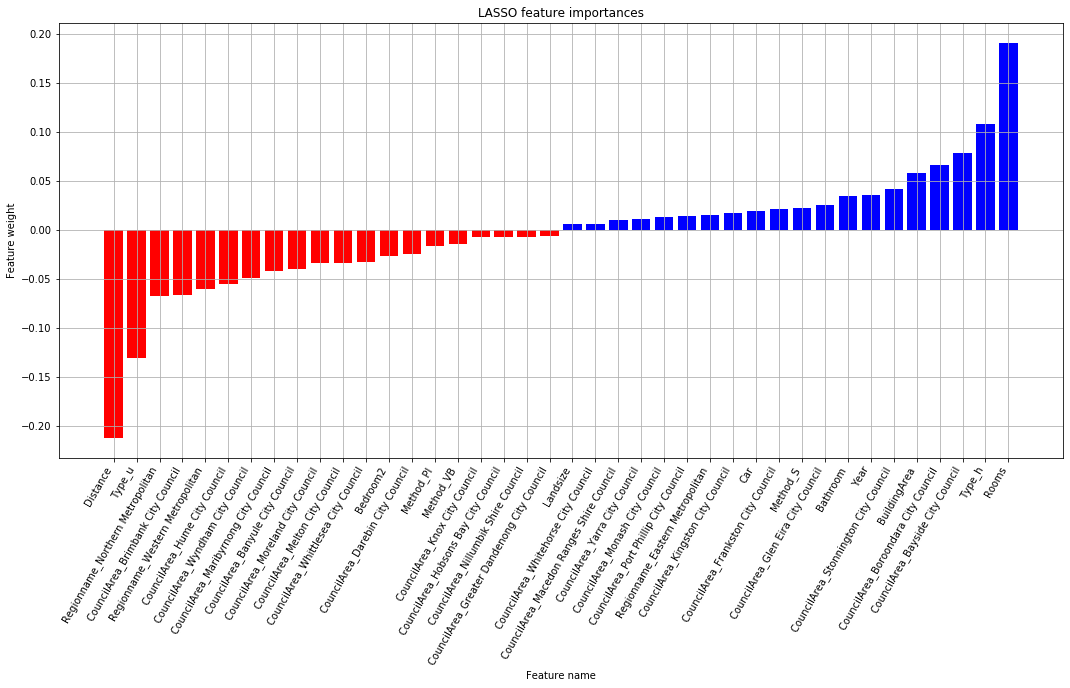

In [123]:
visualize_coefficients(model_grid.best_estimator_.steps[1][1], 
                       X_ohe_train.columns, 
                       n_top_features=20)

In [124]:
y_pred_train = from_log(model_grid.predict(X_ohe_train))
y_pred_valid = from_log(model_grid.predict(X_ohe_valid))

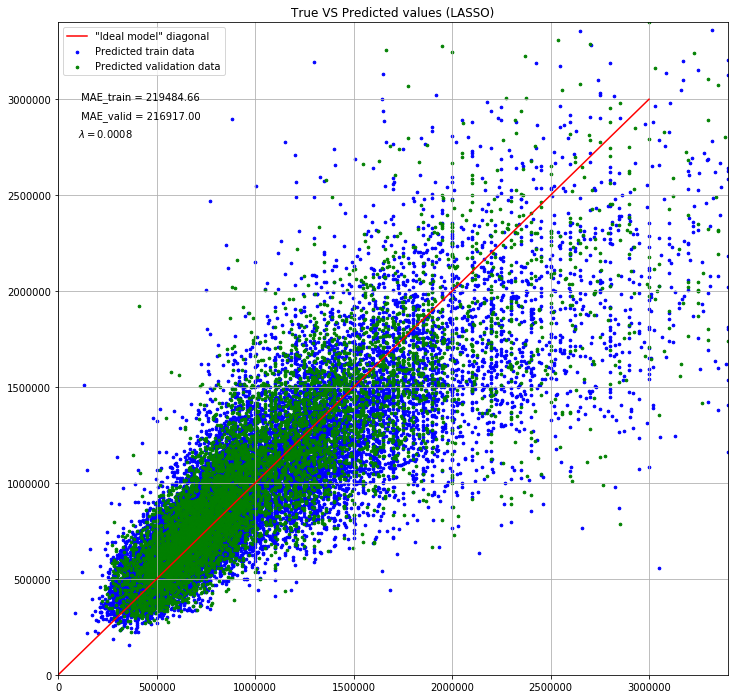

In [125]:
plt.figure(figsize=(12,12))
plt.xlim((0, y.quantile(0.99)))
plt.ylim((0, y.quantile(0.99)))
plt.scatter(y=y_pred_train,  x=y_train, c='blue', s=7)
plt.scatter(y=y_pred_valid,  x=y_valid, c='green', s=7)
plt.plot([0,3e6],[0, 3e6], 'r-')
plt.legend(['"Ideal model" diagonal','Predicted train data','Predicted validation data'])
plt.text(s=" MAE_train = {0:.2f}".format(mae(y_pred_train, y_train)), x=1e5, y=3e6)
plt.text(s=" MAE_valid = {0:.2f}".format(mae(y_pred_valid, y_valid)),  x=1e5, y=2.9e6)
plt.text(s="""$ \\lambda = {0:.4f} $""".format(model_grid.best_estimator_.steps[1][1].alpha), x=1e5, y=2.8e6)
plt.title("True VS Predicted values (LASSO)")
plt.grid()

Since, we got $MAE_{train} = 219484$  and $MAE_{valid} = 216917$.

Let's try do better by creation some new features.

### Creation of new features and description of this process

In [126]:
split_index = int(0.7*data.shape[0])

data_sorted = data.sort_values(by='Date')
data_sorted.reset_index(inplace=True, drop=True)

In [127]:
X_train_2 = data_sorted.loc[: split_index, :]
X_valid_2 = data_sorted.loc[split_index:, :]

In [128]:
y_train_2 = X_train_2['Price']
y_valid_2 = X_valid_2['Price']

In [129]:
# Check shapes
X_train_2.shape, X_valid_2 .shape

((18239, 24), (7817, 24))

#### Features from YearBuilt

In [131]:
# Year Built

X_train_2['old'], X_train_2['middle'], X_train_2['new'] = 0, 0, 0
X_valid_2['old'], X_valid_2['middle'], X_valid_2['new'] = 0, 0, 0

X_train_2.loc[X_train_2['YearBuilt'] < 1942, 'old'] = 1
X_train_2.loc[(X_train_2['YearBuilt'] >= 1942) & (X_train_2['YearBuilt'] <= 2012), 'middle'] = 1
X_train_2.loc[X_train_2['YearBuilt'] > 2012, 'new'] = 1

X_valid_2.loc[X_valid_2['YearBuilt'] < 1942, 'old'] = 1
X_valid_2.loc[(X_valid_2['YearBuilt'] >= 1942) & (X_valid_2['YearBuilt'] <= 2012), 'middle'] = 1
X_valid_2.loc[X_valid_2['YearBuilt'] > 2012, 'new'] = 1

X_train_2['1970'], X_valid_2['1970'] = 0, 0
X_train_2.loc[X_train_2['YearBuilt'] == 1970, '1970'] = 1
X_valid_2.loc[X_valid_2['YearBuilt'] == 1970, '1970'] = 1

C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mahsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [132]:
count_by_year_built = X_train_2\
                    .groupby('YearBuilt')['Suburb']\
                    .count()\
                    .reset_index()\
                    .rename(columns={'Suburb':'HousesBuiltInYear'})

In [133]:
mean_price_by_year_built = X_train_2.groupby('YearBuilt')['Price'].mean().reset_index()

In [134]:
mean_price_by_year_built = pd.merge(mean_price_by_year_built, 
                                    count_by_year_built, on=['YearBuilt'])

In [135]:
# The most expensive and cheapest houses by YearBuilt

top_year_built_by_price = mean_price_by_year_built\
                            .query("HousesBuiltInYear > 10")\
                            .sort_values(by=['Price'], ascending=False)\
                            .head(10)['YearBuilt']\
                            .tolist()

last_year_built_by_price = mean_price_by_year_built\
                            .query("HousesBuiltInYear > 10")\
                            .sort_values(by=['Price'], ascending=False)\
                            .tail(10)['YearBuilt']\
                            .tolist()

X_train_2['TopYearBuilt'], X_train_2['LastYearBuilt'] = 0, 0
X_valid_2['TopYearBuilt'], X_valid_2['LastYearBuilt'] = 0, 0

X_train_2.loc[X_train_2['YearBuilt'].isin(top_year_built_by_price), 'TopYearBuilt'] = 1
X_valid_2.loc[X_valid_2['YearBuilt'].isin(top_year_built_by_price), 'TopYearBuilt'] = 1

X_train_2.loc[X_train_2['YearBuilt'].isin(last_year_built_by_price), 'LastYearBuilt'] = 1
X_valid_2.loc[X_valid_2['YearBuilt'].isin(last_year_built_by_price), 'LastYearBuilt'] = 1

C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\mahsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

#### Features from Streets

In [136]:
# The most expensive and cheapest houses by Streets

price_by_street = X_train_2.groupby('Street')['Price'].mean().reset_index()
count_by_street = X_train_2.groupby('Street')['Suburb'].count().reset_index().rename(columns={'Suburb':'HousesCount'})

price_by_street = pd.merge(price_by_street, count_by_street, on=['Street'])

top_streets = price_by_street\
                .query("HousesCount > 10")\
                .sort_values(by=['Price'], ascending=False)\
                .head(50)['Street']\
                .tolist()

last_streets = price_by_street\
                .query("HousesCount > 10")\
                .sort_values(by=['Price'], ascending=False)\
                .tail(50)['Street']\
                .tolist()

X_train_2['TopStreet'], X_train_2['LastStreet'] = 0, 0
X_valid_2['TopStreet'], X_valid_2['LastStreet'] = 0, 0

X_train_2.loc[X_train_2['Street'].isin(top_streets), 'TopStreet'] = 1
X_valid_2.loc[X_valid_2['Street'].isin(top_streets), 'TopStreet'] = 1

X_train_2.loc[X_train_2['Street'].isin(last_streets), 'LastStreet'] = 1
X_valid_2.loc[X_valid_2['Street'].isin(last_streets), 'LastStreet'] = 1

C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mahsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

#### One hot encoding for other cat. features and dropping other columns

In [138]:
#  Cat.features
ohe_features_2 = ['Type', 'Method', 'CouncilArea', 'Regionname']

X_ohe_train_2 = make_one_hot_encoding(X_train_2, features=ohe_features_2)
X_ohe_valid_2 = make_one_hot_encoding(X_valid_2, features=ohe_features_2)

In [139]:
X_ohe_train_2.shape, X_ohe_valid_2.shape

((18239, 77), (7817, 77))

In [140]:
cols_to_drop = ['Suburb','Price', 'SellerG', 'Date', 'Postcode','Lattitude', 
                'Longtitude', 'Propertycount', 'Street', 'HouseNumber', 'YearBuilt', 
                'Month', 'Year']

X_ohe_train_2.drop(cols_to_drop, axis=1, inplace=True)
X_ohe_valid_2.drop(cols_to_drop, axis=1, inplace=True)

In [141]:
X_ohe_train_2.shape, X_ohe_valid_2.shape

((18239, 64), (7817, 64))

In [142]:
# Save copy for test RandomForestRegressor
X_ohe_train_rf = X_ohe_train_2.copy()
X_ohe_valid_rf = X_ohe_valid_2.copy()

#### Polynomial features

In [143]:
from sklearn.preprocessing import PolynomialFeatures


features_to_poly = ['Regionname', 'Type', 'Street', 'Method', 'YearBuilt']
cols_to_poly = []
for col_name in X_ohe_train_2.columns:
    for f in features_to_poly:
        if f in col_name:
            cols_to_poly.append(col_name)

poly_generator = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

X_train_poly_2 = poly_generator.fit_transform(X_ohe_train_2[cols_to_poly])
X_valid_poly_2 = poly_generator.transform(X_ohe_valid_2[cols_to_poly])

X_ohe_train_2 = np.hstack([X_ohe_train_2.drop(cols_to_poly, axis=1), X_train_poly_2])
X_ohe_valid_2 = np.hstack([X_ohe_valid_2.drop(cols_to_poly, axis=1), X_valid_poly_2])

In [144]:
X_ohe_train_2.shape, X_ohe_valid_2.shape

((18239, 254), (7817, 254))

In [145]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
model_grid.fit(X_ohe_train_2, to_log(y_train_2))

C:\Users\mahsan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3182384548264565, tolerance: 0.09022251906077154
  positive)
C:\Users\mahsan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2435282627481, tolerance: 0.17496205538806858
  positive)
C:\Users\mahsan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8728621112095425, tolerance: 0.2666743317265671
  positive)
C:\Users\mahsan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

Wall time: 25.4 s


In [146]:
y_pred_train_2 = from_log(model_grid.predict(X_ohe_train_2))
y_pred_valid_2 = from_log(model_grid.predict(X_ohe_valid_2))

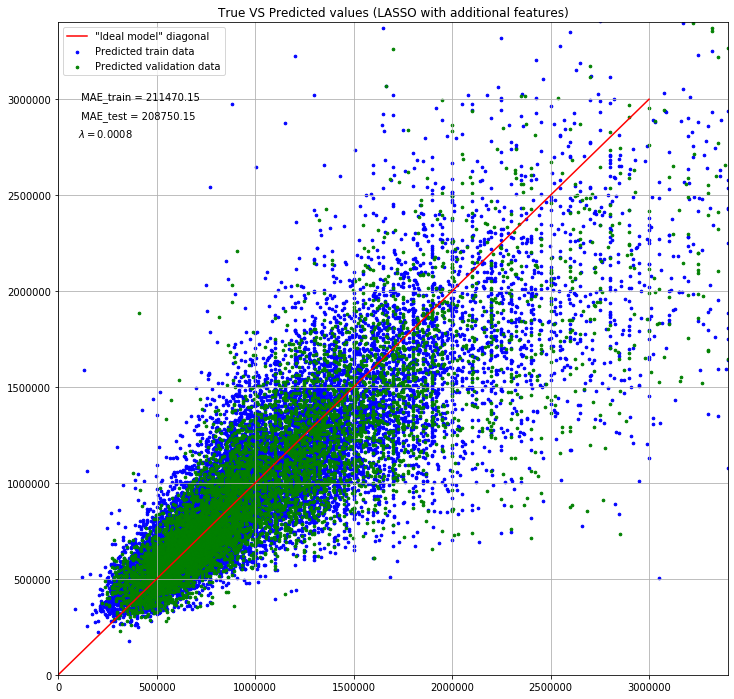

In [147]:
plt.figure(figsize=(12,12))
plt.xlim((0, y.quantile(0.99)))
plt.ylim((0, y.quantile(0.99)))
plt.scatter(y=y_pred_train_2,  x=y_train, c='blue', s=7)
plt.scatter(y=y_pred_valid_2,  x=y_valid, c='green', s=7)
plt.plot([0,3e6],[0, 3e6], 'r-')
plt.legend(['"Ideal model" diagonal','Predicted train data','Predicted validation data'])
plt.text(s=" MAE_train = {0:.2f}".format(mae(y_pred_train_2, y_train)), x=1e5, y=3e6)
plt.text(s=" MAE_test = {0:.2f}".format(mae(y_pred_valid_2, y_valid)),  x=1e5, y=2.9e6)
plt.text(s="""$ \\lambda = {0:.4f} $""".format(model_grid.best_estimator_.steps[1][1].alpha), x=1e5, y=2.8e6)
plt.title("True VS Predicted values (LASSO with additional features)")
plt.grid()

So, now we got $MAE_{train} = 211470$  and $MAE_{valid} = 208750$. 

We see, that error on validation set decresed on **3.8%**

Now, let's try RandomForest with default parameters on the same features (but without polynomial features):

In [149]:
%%time
rf = RandomForestRegressor(n_estimators=300, random_state=42).fit(X_ohe_train_rf, to_log(y_train_2))

Wall time: 36.8 s


In [150]:
y_pred_train_rf = from_log(rf.predict(X_ohe_train_rf))
y_pred_valid_rf = from_log(rf.predict(X_ohe_valid_rf))

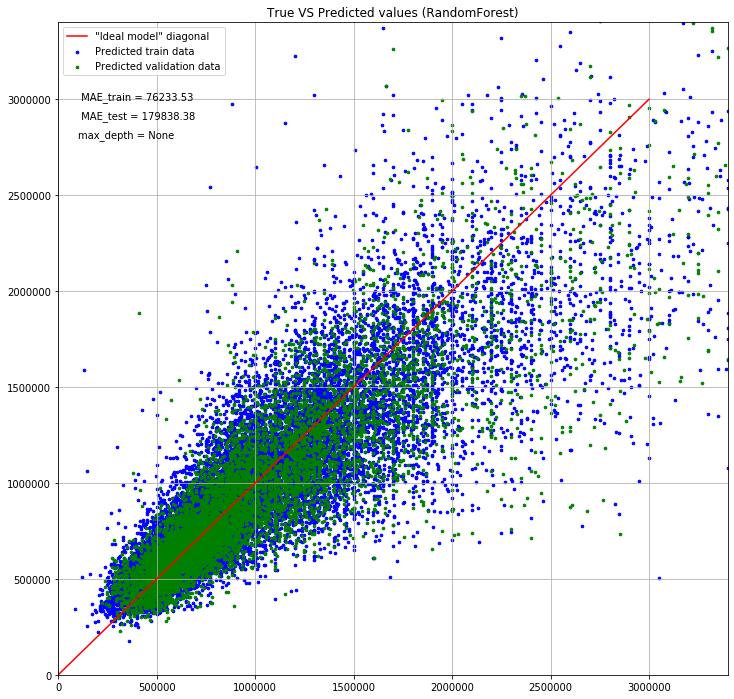

In [151]:
plt.figure(figsize=(12,12))
plt.xlim((0, y.quantile(0.99)))
plt.ylim((0, y.quantile(0.99)))
plt.scatter(y=y_pred_train_2,  x=y_train, c='blue', s=7)
plt.scatter(y=y_pred_valid_2,  x=y_valid, c='green', s=7)
plt.plot([0,3e6],[0, 3e6], 'r-')
plt.legend(['"Ideal model" diagonal','Predicted train data','Predicted validation data'])
plt.text(s=" MAE_train = {0:.2f}".format(mae(y_pred_train_rf, y_train)), x=1e5, y=3e6)
plt.text(s=" MAE_test = {0:.2f}".format(mae(y_pred_valid_rf, y_valid)),  x=1e5, y=2.9e6)
plt.text(s="max_depth = {0} ".format(rf.max_depth), x=1e5, y=2.8e6)
plt.title("True VS Predicted values (RandomForest)")
plt.grid()

We got **overfitted model**, because error on the train dataset is more than twice(!) lower, than error on the validation set.

So, let's try tune hyperparameters of RandomForest using cross-validation to get better quality.

### Plotting training and validation curves

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
from sklearn.metrics import make_scorer

# Create scorer with our MAE-function
scorer = make_scorer(mae, greater_is_better=False)

In [154]:
# MAE-function for logarithmic inputs
def mae_score(y_true, y_pred):
    return mae(from_log(y_true), from_log(y_pred))

In [155]:
scorer = make_scorer(mae_score)

In [156]:
# List of params values
max_depth_list = [10, 12, 13, 15, 17, 20, 25]

In [157]:
%%time
cv_errors_list = []
train_errors_list = []
valid_errors_list = []

for max_depth in max_depth_list:
    rf = RandomForestRegressor(n_estimators=300, max_depth=max_depth,random_state=42)

    
    cv_errors = cross_val_score(estimator=rf, 
                                  X=X_ohe_train_rf, 
                                  y=to_log(y_train_2), 
                                  scoring=scorer,
                                  cv=TimeSeriesSplit(n_splits=5))  
    cv_errors_list.append(cv_errors.mean())
    
    rf.fit(X=X_ohe_train_rf, y=to_log(y_train_2))
    
    valid_error = mae_score(to_log(y_valid_2), rf.predict(X_ohe_valid_rf))    
    valid_errors_list.append(valid_error)
    
    train_error = mae_score(to_log(y_train_2), rf.predict(X_ohe_train_rf))
    train_errors_list.append(train_error)
    
    print(max_depth)
    

10
12
13
15
17
20
25
Wall time: 12min 41s


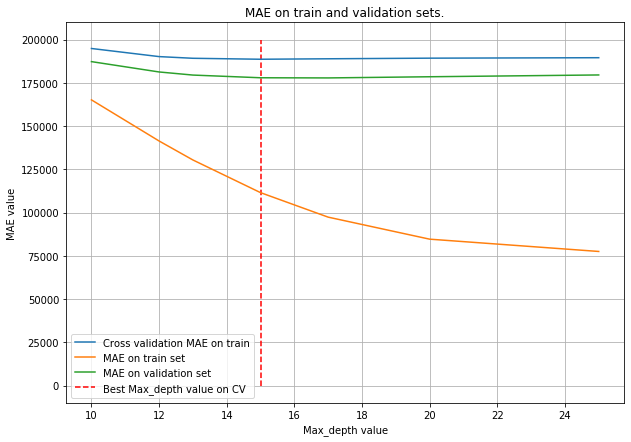

In [158]:
plt.figure(figsize=(10, 7))

plt.plot(max_depth_list,cv_errors_list)
plt.plot(max_depth_list,train_errors_list)
plt.plot(max_depth_list,valid_errors_list)
plt.vlines(x=max_depth_list[np.array(cv_errors_list).argmin()], 
           ymin=0, ymax=2e5, 
           linestyles='dashed', colors='r')

plt.legend(['Cross validation MAE on train', 
            'MAE on train set', 
            'MAE on validation set', 
            'Best Max_depth value on CV'])
plt.title("MAE on train and validation sets.")
plt.xlabel('Max_depth value')
plt.ylabel('MAE value')
plt.grid()

In [160]:
rf.max_depth

25

### Prediction for test or hold-out samples

In [165]:
rf_best = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)

In [166]:
rf_best.fit(X_ohe_train_rf, to_log(y_train_2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [167]:
y_pred_train_rf_best = from_log(rf_best.predict(X_ohe_train_rf))
y_pred_valid_rf_best = from_log(rf_best.predict(X_ohe_valid_rf))

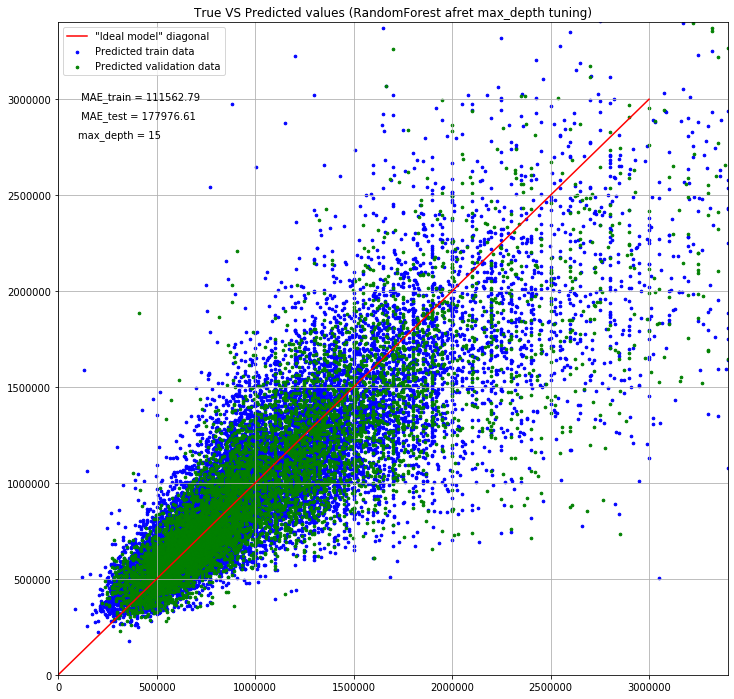

In [168]:
plt.figure(figsize=(12,12))
plt.xlim((0, y.quantile(0.99)))
plt.ylim((0, y.quantile(0.99)))
plt.scatter(y=y_pred_train_2,  x=y_train, c='blue', s=7)
plt.scatter(y=y_pred_valid_2,  x=y_valid, c='green', s=7)
plt.plot([0,3e6],[0, 3e6], 'r-')
plt.legend(['"Ideal model" diagonal','Predicted train data','Predicted validation data'])
plt.text(s=" MAE_train = {0:.2f}".format(mae(y_pred_train_rf_best, y_train)), x=1e5, y=3e6)
plt.text(s=" MAE_test = {0:.2f}".format(mae(y_pred_valid_rf_best, y_valid)),  x=1e5, y=2.9e6)
plt.text(s="max_depth = {0} ".format(rf_best.max_depth), x=1e5, y=2.8e6)
plt.title("True VS Predicted values (RandomForest afret max_depth tuning)")
plt.grid()

So, MAE on train is increased significantly, but MAE on validation is slightly decreased. That mean, that now our model isn't so overfitted as before and has more generalizing ability.

### Conclusions

Solution may be useful for **real estate agencies**, who collect such data and try to predict the most adequate prices for properties. It's important, because it allows them to sell/buy properties as soos as possible without money losses and with saving customer loyalty.

Possible cases for model improving is creating more useful features and experiments with other types of models, for example, using as gradient boosting (xgboost, LightGBM, CatBoost)